# STEP 1: Reading in the Reddit Data
What we want to do here is to get the Reddit post ID and store those so we can access each post and it's comments for analysis.

In [ ]:
import nltk
nltk.download('vader_lexicon')
nltk.download('wordnet')
!pip install praw
!pip install get_all_tickers
!pip install yfinance

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
     |████████████████████████████████| 163kB 9.0MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
  Created wheel for get-all-tickers: filename=get_all_tickers-1.7-cp37-none-any.whl size=4242 sha256=e753b74482ac7b3dbe59ea0c4a1135ad22db7f25ea20ae909f7f0ae4078cb030
  Stored in directory: /root/.cache/pip/wheels/d0/8b/ef/6cd3580f4b479aef881a32bd937c282982e3d186b617a663ac
Successfully built get-all-tickers
     |████████████████████████████████| 5.5MB 13.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=90d988a22351e7c733530a9c56487c278281e39ebf898f714382e27d136754e4
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling

In [ ]:
import yfinance as yf
import praw
import re
import pandas as pd
import numpy as np
import datetime
import math
import seaborn as sns
import string
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import linear_model
from sklearn import preprocessing
import numpy as np
from bs4 import BeautifulSoup
from tqdm import tqdm
import numba as nb
import nltk
from nltk.corpus import stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
import pandas as pd
from ast import literal_eval
from datetime import date
import datetime
from wordcloud import WordCloud

analyser = SentimentIntensityAnalyzer()
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.PorterStemmer()

MAIN_FILE = 'feb-01-feb-28-2021'

# AVAILABLE FILES
# june-16-june-22-2016
# feb-01-feb-28-2021
# large_dataset

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
# Connecting to Reddit API
reddit = praw.Reddit(client_id='w1H7jLbJPqsagQ',
                     client_secret='SbyknIGvZUUQ_sVhH3s3uwfnDvlerw',
                     user_agent='sirwazowski',
                     check_for_async=True)

# for submission in reddit.subreddit('wallstreetbets').new(limit=10):
#     posts.append(submission.id)

# IDs of all the post that we will be analysing
posts = pd.read_csv('drive/MyDrive/Colab_Notebooks/data/dataset_raw/' + MAIN_FILE + '.csv')
print("Shape of data: ", posts.shape)
posts = list(posts['Post ID'])

FileNotFoundError: ignored

## UTILITIES

In [ ]:
# READING IN REALLY LARGE CSV files

import pandas as pd

filename = 'drive/MyDrive/Colab_Notebooks/data/dataset_cleaned/wsbData.csv'
chunksize = 17 ** 8
data = pd.DataFrame()
for chunk in pd.read_csv(filename, chunksize=chunksize, low_memory=True):
  data = chunk

data.head

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,9,10,11,16,17,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<bound method NDFrame.head of                                                                                                   gilded  ... score_hidden
0       [deleted]                                          False          True                t1_chi0ufo  ...          NaN
1       Lol. Yeah, Welp.                                   False          False               t1_cl52foo  ...          NaN
2       [deleted]                                          False          True                t1_ch5wdhy  ...          NaN
3       Crypto miners is not a significant enough marke... False          True                t1_cfj9fzo  ...          NaN
4       Sold a covered call at 560. I almost wish it dr... False          True                t1_ch0jw88  ...          NaN
...                                                                                                  ...  ...          ...
2979126 true tho in't it                                   doom_pork      NaN                 1485678518  ...

In [ ]:
# SPLITS THE COLUMN INTO CHUNKS 
two_split = np.array_split(data, 1)

two_split = two_split[12:]

two_split


[array(['t1_chi0ufo', 't1_cl52foo', 't1_ch5wdhy', ..., 't1_cftsy8n',
        't1_cf06bmq', 't1_cfx4um1'], dtype='<U66'),
 array(['t1_cgpg3pv', 't1_cgl1eik', 't1_cgmokic', ..., 't1_cfd8dwf',
        't1_cg7un4h', 't1_cmudrlk'], dtype='<U66'),
 array(['t1_cggr44b', 't1_cmmhc8r', 't1_cjnhkrv', ..., 'nan', 't1_clpealr',
        't1_cfv9cfu'], dtype='<U66'),
 array(['t1_ciynhho', 't1_cimzqzb', 't1_ckmh3kp', ..., '1481845041',
        '1481214408', '1482343664'], dtype='<U66'),
 array(['1481221078', '1481572831', '1481055056', ..., '1481146462',
        '1481147247', '1482604839'], dtype='<U66'),
 array(['1481315610', '1482514826', '1480704862', ..., 't5_2th52',
        't5_2th52', 't5_2th52'], dtype='<U66'),
 array(['t5_2th52', 't5_2th52', 't5_2th52', ..., 't5_2th52', 't5_2th52',
        't5_2th52'], dtype='<U66'),
 array(['t5_2th52', 't5_2th52', 't5_2th52', ..., 't5_2th52', 't5_2th52',
        't5_2th52'], dtype='<U66'),
 array(['t5_2th52', 't5_2th52', 't5_2th52', ..., 't5_2th52', 't5_2th5

Open your browser console and copy and paste the code bellow, that will avoid you to get kicked off for being idle.

```
function ClickConnect() {
console.log("Working"); 
document
  .querySelector('#top-toolbar > colab-connect-button')
  .shadowRoot.querySelector('#connect')
  .click() 
}
setInterval(ClickConnect, 60000)
```



In [ ]:
# USED TO GET THE COMMENTS FROM AN UNLABBELED COLUMNS

data2 = data.copy(deep = True)

string_list = []
lower = 30000*54
higher = 30000
interval = 55

def seperate(x):
  print(x)
  x = x.split('\t')
  string_list.append(x[0])

gilded = data2['gilded']

L = lower

while interval < 100:
  string_list = []
  H = higher * interval

  for index in tqdm(range(L, H)):
    line = str(gilded[index])
    line = line.split('  ')
    string_list.append(line[0])

  df = pd.DataFrame({'comment':string_list, 'tickers':string_list})
  df.to_csv('drive/MyDrive/Colab_Notebooks/data/Temporary/large-'+str(interval)+'.csv', index=False)
  L = L + 30000
  interval += 1


100%|██████████| 30000/30000 [03:10<00:00, 157.78it/s]


In [ ]:
data.to_csv('drive/MyDrive/Colab_Notebooks/data/dataset_comments/'+MAIN_FILE+'.csv', index=False)

In [ ]:
# Combine the chunked datasets if not done already

import os
import glob
import pandas as pd
# os.chdir("drive/MyDrive/Colab_Notebooks/data/Temporary/")

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( MAIN_FILE + ".csv", index=False, encoding='utf-8-sig')


# STEP 2: Retrieving all posts & comments

In the following cells we will scrape data from a number of 'daily discussion posts' on Wall Street Bets and put this data into a dataframe for visualization later on. We will collect comments, users, time stamps, karma, and lastly interaction via comments.
Im importing and using NUMBA to try and speed up the processing

In [ ]:
# total = datetime.datetime.now()

@nb.jit(nopython=True)
def fun(comment):
    all_posts1.append([comment.author, comment.author.comment_karma, datetime.datetime.fromtimestamp(comment.created_utc), comment.body, comment.score, comment.distinguished, len(comment.replies), i, post, comment.body])

part = 0 # NEED TO CHANGE THIS TO THE NUMBER ASWELL

for array in two_split:
  part += 1
  all_posts1 = []
  for post in tqdm(array): # tqdm is a progress bar 
      i = 1
      submission = reddit.submission(id = post)
      submission.comment_sort = "top"
      submission.comments.replace_more(limit=2)
      for comment in submission.comments.list():

          try:
              fun(comment)

          except Exception:
              all_posts1.append(['deleted', 'deleted',datetime.fromtimestamp(comment.created_utc),comment.body, comment.score,comment.distinguished,len(comment.replies),i,post, comment.body])

          i = i + 1
          
  wsb2 = pd.DataFrame(all_posts1,columns=['redditor', 'karma','time' ,'comment','upvotes','gilded','interaction','rank','post_id', 'tickers'])
  wsb2.to_csv('drive/MyDrive/Colab_Notebooks/data/dataset_comments/june-16-june-22-2016.csv', index=False)
  print("SAVED: " + str(part))

print("SAVED")

In [ ]:
# wsb2.to_csv('drive/MyDrive/Colab_Notebooks/data/dataset_comments/june-16-june-22-2016.csv', index=False)
wsb2

# STEP 3: Getting ticker from text

When the data from reddit is first added to our data frame the "comment" column and "tickers" column are the same. Before we match tickers in comments with stocks we need to import a list of stocks using get_all_tickers. We use the get_all_tickers_filtered function.

We have also created a short list of blacklisted common words that should be excluded from our list of tickers such as "ARE" and "HAS".

We will preprocess this data from reddit by cross checking any words in the comment with stock tickers using our list of tickers we imported.

In [ ]:
from get_all_tickers import get_tickers as gt

file = 'drive/MyDrive/Colab_Notebooks/data/dataset_comments/' + MAIN_FILE+'.csv'
list_of_tickers_file = 'drive/MyDrive/Colab_Notebooks/data/list_of_tickers.csv'

import csv

with open(list_of_tickers_file, newline='') as f:
    reader = csv.reader(f)
    list_of_tickers = list(reader)

list_of_tickers = list_of_tickers[0]

wsb2 = pd.read_csv(file)
print(wsb2.columns)
wsb2


Index(['comment', 'tickers'], dtype='object')


comment                                            tickers
0                                                [deleted]                                          [deleted]
1                                         Lol. Yeah, Welp.                                   Lol. Yeah, Welp.
2                                                [deleted]                                          [deleted]
3        Crypto miners is not a significant enough mark...  Crypto miners is not a significant enough mark...
4        Sold a covered call at 560. I almost wish it d...  Sold a covered call at 560. I almost wish it d...
...                                                    ...                                                ...
2969995                    We've talked about this before,                    We've talked about this before,
2969996                                          [deleted]                                          [deleted]
2969997                       No, the mass market doesn't.                       No, the mass market doesn't.
2969998                                 Maple syrup please                                 Maple syrup please
2969999  Yellen will speak and I will spank. Sinkaputt ...  Yellen will speak and I will spank. Sinkaputt ...

[2970000 rows x 2 columns]

In [ ]:
# Cross check valid stock ticker symbols mentions from list
import drive.MyDrive.Colab_Notebooks.data.black_listed as bl

lookup = set(list_of_tickers)

common_words = bl.blacklisted_words

wsb = wsb2.copy(deep = True)
for index, row in tqdm(wsb.iterrows()):
    reg_tickers = re.findall(r'[$][A-Z][\S]*', str(row['tickers']))
    reg_tickers = [e[1:] for e in reg_tickers]
    other_tickers =  re.findall(r'\b[A-Z][a-zA-Z]{1,4}\b', str(row['tickers']))
    all_tick = reg_tickers + other_tickers
    final = []
    for tick in all_tick:
        if tick.upper() in lookup and tick.lower() not in common_words:
            final.append(tick.upper())
    wsb.at[index, 'tickers'] = final


2970000it [07:21, 6719.50it/s]


2970000it [04:09, 11924.85it/s]


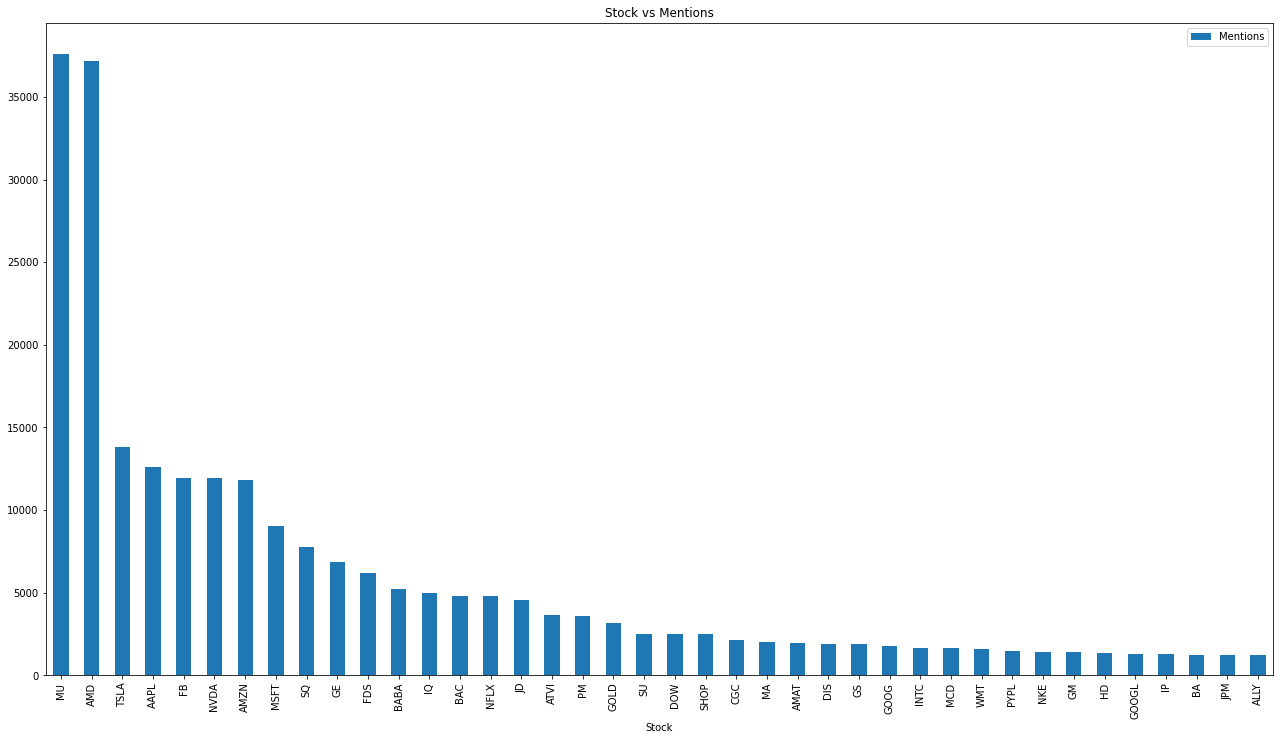

In [ ]:
#for index, row in wsb.iterrows():
   # wsb.at[index,'time']  = row['time']
    
# Maybe the issue is that it cant read float cause it's a string

freq = {}
for index, row in tqdm(wsb.iterrows()):
    for tick in row['tickers']:
        if tick in freq:
            freq[tick] = freq[tick] + 1
        else:
            freq[tick] = 1
freq_df = pd.DataFrame(freq.items(), columns=['Stock', 'Mentions'])
freq_df = freq_df.sort_values(by=['Mentions'], ascending = False)
freq_df = freq_df.head(40)
freq_df.plot(kind='bar', x = "Stock", title = "Stock vs Mentions", figsize=(22,12))

# STEP 3.5: Getting historical stock data

**Visualizing Data**

In the following cells we will be taking a look at what users on Wall Street Bets are most interested in.

In [ ]:
fetch_stocks = freq_df['Stock'].to_list()


In [ ]:

data = yf.download(fetch_stocks, start="2016-02-01", end="2021-02-28")
data.head()

[*********************100%***********************]  40 of 40 completed


Adj Close                        ...   Volume                    
                 AAPL       ALLY       AMAT  ...       SU      TSLA       WMT
Date                                         ...                             
2016-02-01  22.301582  14.416263  16.375488  ...  7696800  26488000  14728400
2016-02-02  21.850603  14.452191  15.818810  ...  7596200  28868000  13585900
2016-02-03  22.283085  15.341417  16.041483  ...  7984000  39657000  12315600
2016-02-04  22.462126  15.422257  16.310539  ...  6258600  21927000  12833400
2016-02-05  21.862209  15.278545  15.596144  ...  5939000  47188000  14196500

[5 rows x 240 columns]

In the following cell, we will be plotting the price for the stocks mentioned on Wallstreetbets and comparing the interest (frequency of the ticker being mentioned) for some basic correlation matching

2970000it [04:13, 11729.32it/s]
1278it [00:00, 15910.43it/s]
2970000it [04:08, 11933.01it/s]
1278it [00:00, 15182.51it/s]
2970000it [04:08, 11948.88it/s]
1278it [00:00, 12928.99it/s]


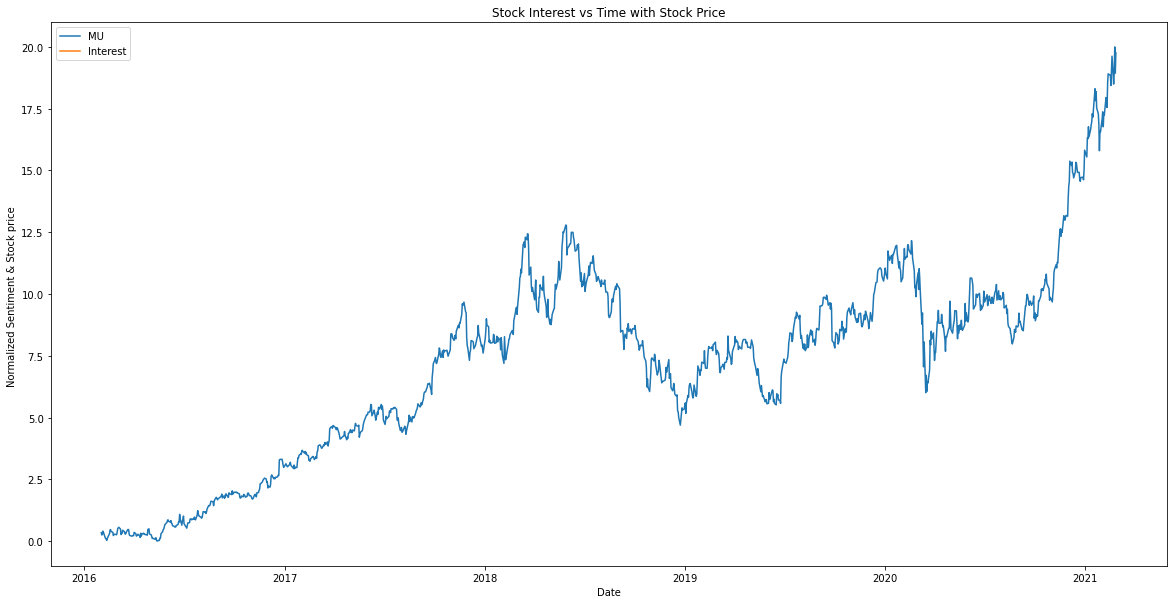

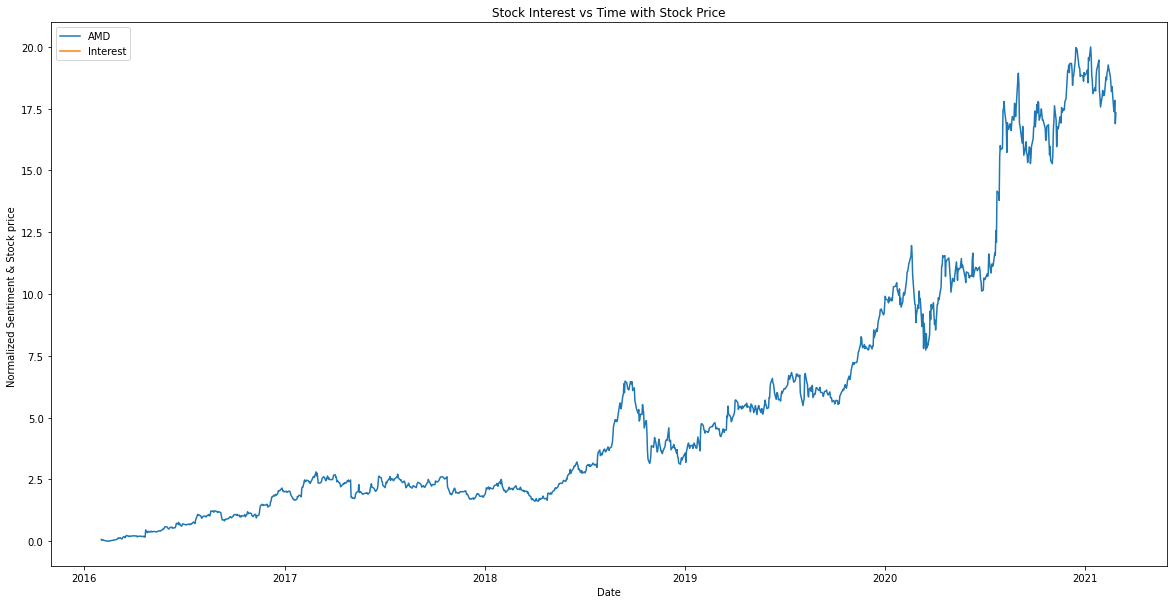

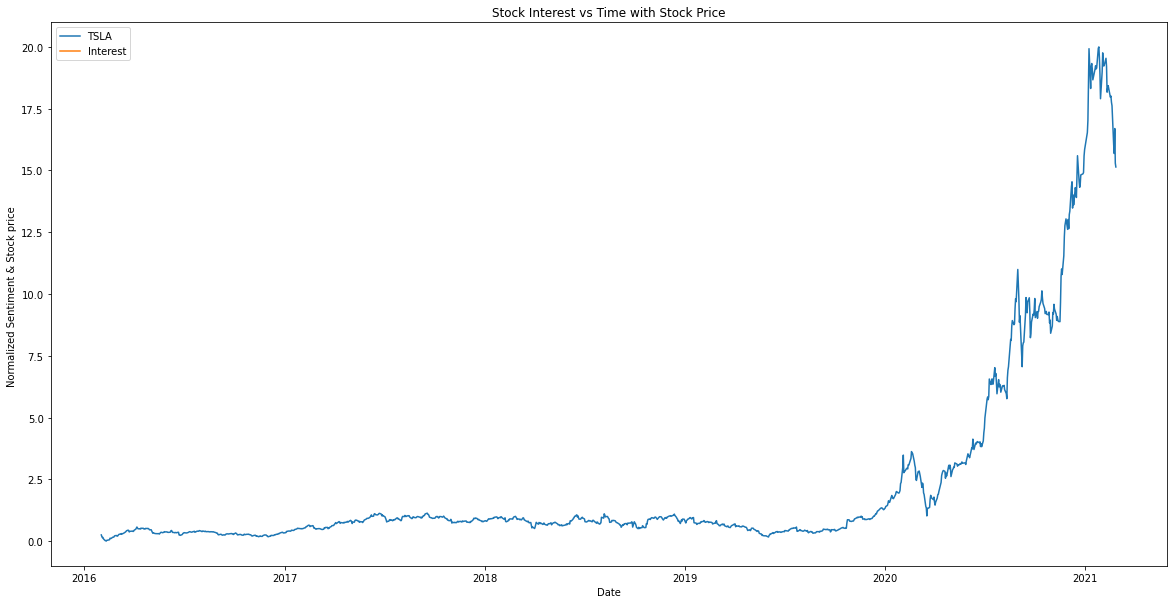

In [ ]:
from sklearn import preprocessing

def aggregate_interest(s):
    stock_time = {}
    for index, row in tqdm(wsb.iterrows()):
        if s in row['tickers']:
            #date = str(datetime.strptime(row['time'], '%Y-%m-%d %H:%M:%S').date())
            if date in stock_time:
                stock_time[date] = stock_time[date] + 1
            else:
                stock_time[date] = 1
    df = data.filter([('Adj Close', s),('Close', s),('High', s),('Low', s),('Open', s),('Volume', s)], axis=1)
    toAppend = []
    for i, row in tqdm(df.iterrows()):
        if str(i.date()) in stock_time:
            toAppend.append(stock_time[str(i.date())])
        else:
            toAppend.append(0)
            
    df['interest'] = toAppend
    
    # Normalising data
    df=((df-df.min())/(df.max()-df.min()))*20
    
    plt.figure(figsize=(20,10))
    f1 = sns.lineplot(data=df["Close"])
    
    f2 = sns.lineplot(data=df["interest"],  label="Interest")
   
    res1 = f1.get_figure()
    res2 = f2.get_figure()
    
    plt.title("Stock Interest vs Time with Stock Price")
    plt.ylabel("Normalized Sentiment & Stock price ")
    plt.xlabel("Date")
    plt.legend(loc="upper left")
    return (res1,res2)


# top 1 interest
for i in range(0, 3):
    (res1, res2) = aggregate_interest(fetch_stocks[i])

# STEP 4: Data Cleaning
Now that we have gotten the ticker from each of the comments and posts, we can clean our data filtering the bad posts.<br>
1. Remove HTML
2. Remove punctuation
3. Tokenize text
4. Remove stop words
5. Lemmatization

In [ ]:
stop_words = pd.read_csv('drive/MyDrive/Colab_Notebooks/data/corpus/stopwords.csv')
stop_words = list(stop_words['stopwords'])

def remove_html(text):
    """
    Removes any html from a piece of text
    :param text:
    :return: html-free text
    """

    soup = BeautifulSoup(text, 'lxml')
    html_free = soup.get_text()
    return html_free


def remove_punctuation(text):
    """
    Removes any punctuation in the piece of text
    :param text:
    :return: punctuation-free text
    """
    no_punctuation = "".join([c for c in text if c not in string.punctuation])
    return no_punctuation


def tokenize_text(text):
    """
    Splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words
    or terms.
    :param text:
    :return: Tokenized textstop
    """
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text.lower())

    return text


def remove_stop_words(text):
    """
    Removes stop words which refers to the most common words in a language
    :param text:
    :return: text with no stop words
    """
#     words = [w for w in text if w.lower() not in stopwords.words('english')]
    words = [w for w in text if w.lower() not in stop_words]

    return words


def word_lemmatizer(text):
    """
    Lemmatization considers the context and converts the word to its meaningful base form
    :param text:
    :return:
    """
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text


def word_stemmer(text):
    """
    Stemming just removes or stems the last few characters of a word
    :param text:
    :return: Stemmed words in a text
    """
    stem_text = " ".join([stemmer.stem(i) for i in text])
    return stem_text


def detokenizer(text):
    """
    Turns the tokenized text back into a string
    :param text:
    :return: Deto
    """
    return TreebankWordDetokenizer().detokenize(text)

def add_corpus():
    """
    Adds custom words & polarity scores to the VADER lexicon for sentiment Analysis
    :return:
    """

    dict_words = pd.read_csv('drive/MyDrive/Colab_Notebooks/data/corpus/dict.csv', names=['word', 'score'])

    words = list(dict_words['word'])
    score = list(dict_words['score'])

    dictionary = dict(zip(words, score))
    analyser.lexicon.update(dictionary)

Remove any rows which are not accociated with a ticker. If there is no ticker, we don't need it's sentiment since we won't know what it's talking about. For all we know it could be a random statement with nothing stock related.

In [ ]:
reddit_data = wsb.copy(deep = True)
cleaned_reddit_data01 = reddit_data[reddit_data['tickers'].astype(bool)]
cleaned_reddit_data01

comment       tickers
3        Crypto miners is not a significant enough mark...    [AMD, AMD]
5        NFLX because earning reports releases. +10-12%...        [NFLX]
41       TSLA is trading on news. Everytime some bad ne...  [TSLA, TSLA]
81       Chances are *something* will happen in the nex...          [IR]
126      Investors punished NFLX because it's been an o...        [NFLX]
...                                                    ...           ...
2969841  15 years is weak but probably can't go wrong w...         [DIS]
2969856                            SpaceX/TSLA AMD buyout?   [TSLA, AMD]
2969927  What do you think NVDA is going to hit Feb aft...        [NVDA]
2969967     $CAT, you gotta build the wall with something.         [CAT]
2969986  Vulcan Materials (VMC) and Martin Marietta (ML...    [VMC, MLM]

[223988 rows x 2 columns]

In [ ]:

cleaned_reddit_data02 = cleaned_reddit_data01.copy(deep = True)
cleaned_reddit_data02['comment'] = cleaned_reddit_data02['comment'].apply(lambda x: remove_html(x))
cleaned_reddit_data02['comment'] = cleaned_reddit_data02['comment'].apply(lambda x: remove_punctuation(x))
cleaned_reddit_data02['comment'] = cleaned_reddit_data02['comment'].apply(lambda x: tokenize_text(x))
cleaned_reddit_data02['comment'] = cleaned_reddit_data02['comment'].apply(lambda x: remove_stop_words(x))
cleaned_reddit_data02['comment'] = cleaned_reddit_data02['comment'].apply(lambda x: word_lemmatizer(x))
cleaned_reddit_data02['comment'] = cleaned_reddit_data02['comment'].apply(lambda x: detokenizer(x))
cleaned_reddit_data02['comment_clean'] = cleaned_reddit_data02['comment'].str.replace("[^a-zA-Z#]", " ") # Remove numbers
# cleaned_reddit_data02['comment_clean'] = cleaned_reddit_data02['comment_clean'].apply(lambda x: tokenize_text(x))
cleaned_reddit_data02

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "http://www.dailydot.com/unclick/half-naked-women-boys-blue-meme/\n\nhttps://www.google.com/finance?q=NASDAQ:NVDA" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://youtu.be/0GIwTG8V-Ko" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "http://www.ebay.com/itm/DOW-20-000-Hat-styled-after-1999-DOW-10-000-hats-issued-by-NYSE-/182389440461?hash=item2a7741ffcd:g:PHAAAOSw4GVYUhWg" looks li

comment  ...                                      comment_clean
3        crypto miner a significant market amd positive...  ...  crypto miner a significant market amd positive...
5              nflx earning report release 1012 week guess  ...        nflx earning report release      week guess
41       tsla trading news everytime bad news come tsla...  ...  tsla trading news everytime bad news come tsla...
81       chance happen 2 week nq ir explicitly er april...  ...  chance happen   week nq ir explicitly er april...
126      investor punished nflx ongoing highflyernnamaz...  ...  investor punished nflx ongoing highflyernnamaz...
...                                                    ...  ...                                                ...
2969841                    15 weak probably cant wrong dis  ...                       weak probably cant wrong dis
2969856                              spacextsla amd buyout  ...                              spacextsla amd buyout
2969927  nvda hit feb earnings im looking picking call dip  ...  nvda hit feb earnings im looking picking call dip
2969967                               cat gotta build wall  ...                               cat gotta build wall
2969986  vulcan material vmc martin marietta mlm im 20 ...  ...  vulcan material vmc martin marietta mlm im    ...

[223988 rows x 3 columns]

In [ ]:
# Remove columns that are not needed
cleaned_reddit_data03 = cleaned_reddit_data02.copy(deep = True)
del cleaned_reddit_data03['redditor']
del cleaned_reddit_data03['karma']
del cleaned_reddit_data03['gilded']
del cleaned_reddit_data03['post_id']
del cleaned_reddit_data03['rank']
del cleaned_reddit_data03['interaction']
del cleaned_reddit_data03['upvotes']
# del cleaned_reddit_data03['tickers']
# del cleaned_reddit_data02['time']
del cleaned_reddit_data03['comment']
cleaned_reddit_data03.dropna(inplace=True)
cleaned_reddit_data03

# STEP 5: Sentiment Analysis

In [ ]:
def add_corpus():
    """
    Adds custom words & polarity scores to the VADER lexicon for sentiment Analysis
    :return:
    """

    dict_words = pd.read_csv('drive/MyDrive/Colab_Notebooks/data/corpus/dict.csv', names=['word', 'score'])

    words = list(dict_words['word'])
    score = list(dict_words['score'])

    dictionary = dict(zip(words, score))
    analyser.lexicon.update(dictionary)
    
def vader_sentiment_text(text):
    """
    VADER Sentiment Analysis: takes in a piece of text and uses VADER to perform SA on it
    :param text:
    :return: sentiment score of the piece of text
    """

    sentiment_score = 0
    try:
        sentiment_score += analyser.polarity_scores(text)['compound']
    except TypeError:
        sentiment_score = 0

    return sentiment_score

In [ ]:
add_corpus() # Add custom words to dictionary for SA

In [ ]:
sentiment_reddit_data = cleaned_reddit_data02.copy(deep = True)
# sentiment_reddit_data['scores'] = sentiment_reddit_data['comment_clean'].apply(lambda x: analyser.polarity_scores(x))
sentiment_reddit_data['neg'] = [analyser.polarity_scores(x)['neg'] for x in sentiment_reddit_data['comment_clean']]
sentiment_reddit_data['neu'] = [analyser.polarity_scores(x)['neu'] for x in sentiment_reddit_data['comment_clean']]
sentiment_reddit_data['pos'] = [analyser.polarity_scores(x)['pos'] for x in sentiment_reddit_data['comment_clean']]
sentiment_reddit_data['compound'] = sentiment_reddit_data['comment_clean'].apply(lambda x: vader_sentiment_text(x))
del sentiment_reddit_data['comment']
sentiment_reddit_data

tickers  ... compound
3          [AMD, AMD]  ...   0.1974
5              [NFLX]  ...   0.0000
41       [TSLA, TSLA]  ...   0.5000
81               [IR]  ...   0.2500
126            [NFLX]  ...  -0.4588
...               ...  ...      ...
2969841         [DIS]  ...  -0.0890
2969856   [TSLA, AMD]  ...   0.0000
2969927        [NVDA]  ...   0.3612
2969967         [CAT]  ...   0.0000
2969986    [VMC, MLM]  ...  -0.3400

[223988 rows x 6 columns]

In [ ]:
sentiment_reddit_data.to_csv('drive/MyDrive/Colab_Notebooks/data/dataset_cleaned/' + MAIN_FILE +'.csv', index=False)

In [ ]:
# create dataframe
file = 'drive/MyDrive/Colab_Notebooks/data/dataset_cleaned/' + MAIN_FILE +'.csv'
df = pd.read_csv(file, converters={'tickers': literal_eval})

# convert the time column to a datetime dtype
df.time = pd.to_datetime(df.time)

# remove values from lists in the tickers column
df = df.explode('tickers').reset_index(drop=True)

# groupby date and ticker columns from sentiment_reddit_data and calculate the mean
mean_scores = df.groupby(['tickers', df.time.dt.date]).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Drop dupes
df = df.drop_duplicates(subset=['comment_clean'])

df

AttributeError: ignored

# STEP 5.1: Visualisation - Common Words

In [ ]:
all_words = ' '.join([text for text in sentiment_reddit_data['comment_clean']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# STEP 5.2: Visualisation - Positive Words

In [ ]:
all_words = ' '.join([text for text in sentiment_reddit_data['comment_clean'][sentiment_reddit_data['compound'] > 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# STEP 5.3: Visualisation - Neutral Words

In [ ]:
all_words = ' '.join([text for text in sentiment_reddit_data['comment_clean'][sentiment_reddit_data['compound'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# STEP 5.4: Visualisation - Negative Words

In [ ]:
all_words = ' '.join([text for text in sentiment_reddit_data['comment_clean'][sentiment_reddit_data['compound'] < 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# STEP 5.5: Visualisation - Ticker Sentiment

In [ ]:
stocks_to_display = ['GME', 'NOK', 'AMZN']

# select some columns and rows to plot
selected = mean_scores.loc[date(2021, 2, 1):date(2021, 2, 16), stocks_to_display]

# Plot a bar chart with pandas
ax = selected.plot.bar(figsize=(20, 7))
ax.set_ylabel('Compound')
ax.set_xlabel('Date')
ax.grid()

# STEP 6: Machine Learning Models

In [ ]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import time
import datetime
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import f1_score

lreg = LogisticRegression()

In [ ]:
def sent(compound):
    
    if(compound > 0):
        return 1
    else:
        return 0

In [ ]:
# Load dataset
file = "drive/MyDrive/Colab_Notebooks/data/dataset_cleaned/"+ MAIN_FILE +".csv"
dataset = read_csv(file,  parse_dates= ['time'])
dataset_original = dataset.copy(deep = True)
dataset = dataset.drop_duplicates(subset=['comment_clean'])

# Remove columns that are not needed
dataset.dropna(inplace=True)

# todo : DROP ROWS WITH COMPOUND == 0

dataset['compound'] = dataset['compound'].apply(lambda x: sent(x))

# shape
# print(dataset.shape)
# descriptions
# print(dataset.describe())
# head
dataset

time                       tickers  ...    pos  compound
0     2021-02-01 13:55:38                       ['GME']  ...  0.242         1
1     2021-02-01 13:00:42         ['GME', 'GME', 'GME']  ...  0.176         0
2     2021-02-01 13:01:30                       ['GME']  ...  0.150         0
3     2021-02-01 13:15:39                       ['JPM']  ...  0.203         0
4     2021-02-01 13:59:19                       ['GME']  ...  0.000         0
...                   ...                           ...  ...    ...       ...
55188 2021-02-16 01:17:46  ['GME', 'GME', 'GME', 'GME']  ...  0.290         1
55189 2021-02-15 16:24:30                       ['GME']  ...  0.000         0
55190 2021-02-15 20:07:56                       ['GME']  ...  0.332         1
55191 2021-02-15 17:18:56                       ['GME']  ...  0.107         0
55192 2021-02-16 01:31:54                       ['GME']  ...  0.298         1

[51382 rows x 7 columns]

## TF - IDF Features
TF-IDF works by penalizing the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

Let’s have a look at the important terms related to TF-IDF:

- TF = (Number of times term t appears in a document)/(Number of terms in the document)
- IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
- TF-IDF = TF*IDF

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(dataset['comment_clean'])
tfidf.shape


(51382, 1000)

In [ ]:
train_tfidf = tfidf[:51382,:]
test_tfidf = tfidf[51382:,:]

# splitting data into training and validation set
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(train_tfidf, dataset['compound'], random_state=23, test_size=0.3)

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

round(f1_score(yvalid, prediction_int), 2)

0.8

## Bag Of Words

In [ ]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(dataset['comment_clean'])
bow.shape

(51382, 1000)

In [ ]:
train_bow = bow[:55193,:]
test_bow = bow[55193:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, dataset['compound'], random_state=23, test_size=0.3)


lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

round(f1_score(yvalid, prediction_int), 2) # calculating f1 score

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.78

#STEP 6.1 ML Algorithms Sentiment


In [ ]:
X = train_bow.toarray() # Choose BoW or TF-IDF
Y = dataset['compound']

# splitting data into training and validation set
xtrain, xtest, ytrain, ytest = train_test_split(X, Y , random_state=23, test_size=0.3)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier()))

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

for name, model in models:
    # fit model
    curr_model = model.fit(xtrain, ytrain)
    
    # predict probabilities
    pred_prob = curr_model.predict_proba(xtest)
    
    # roc curve for models
    fpr, tpr, thresh = roc_curve(ytest, pred_prob[:,1], pos_label=1)
    
    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(ytest))]
    p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=1)
    
    # auc scores
    auc_score = roc_auc_score(ytest, pred_prob[:,1])
    
    result_table = result_table.append({'classifiers':curr_model.__class__.__name__,'fpr':fpr, 'tpr':tpr, 'auc':auc_score}, ignore_index=True)
    
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [ ]:
# splitting data into training and validation set
xtrain, xtest, ytrain, ytest = train_test_split(X, Y,test_size=0.4)

#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy= []
test_accuracy = []

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(xtrain, ytrain)
    
    #Compute accuracy on the training set
    train_accuracy.append(knn.score(xtrain, ytrain))
    
    #Compute accuracy on the test set
    test_accuracy.append(knn.score(xtest, ytest)) 
    
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

time tickers  ...    pos  compound
0      2021-02-01 13:55:38     GME  ...  0.242    0.2732
1      2021-02-01 13:00:42     GME  ...  0.176   -0.8020
4      2021-02-01 13:01:30     GME  ...  0.150   -0.3818
5      2021-02-01 13:15:39     JPM  ...  0.203   -0.7940
6      2021-02-01 13:59:19     GME  ...  0.000   -0.5267
...                    ...     ...  ...    ...       ...
136098 2021-02-16 01:17:46     GME  ...  0.290    0.8126
136102 2021-02-15 16:24:30     GME  ...  0.000   -0.3612
136103 2021-02-15 20:07:56     GME  ...  0.332    0.8800
136104 2021-02-15 17:18:56     GME  ...  0.107   -0.1280
136105 2021-02-16 01:31:54     GME  ...  0.298    0.4877

[51382 rows x 7 columns]

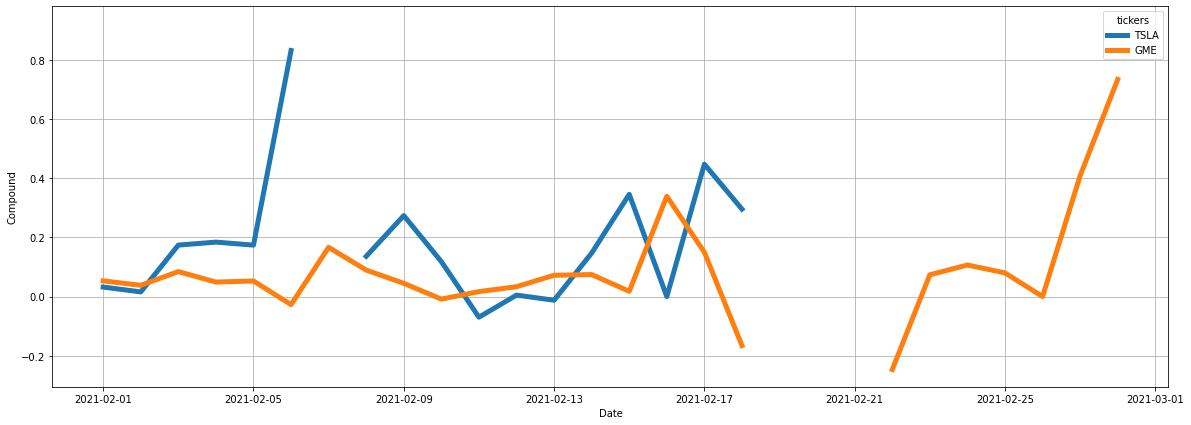

In [ ]:
file = "drive/MyDrive/Colab_Notebooks/data/dataset_cleaned/" + MAIN_FILE +".csv"
dataset = pd.read_csv(file, converters={'tickers': literal_eval})

custom_stocks = 'GME'

# convert the time column to a datetime dtype
dataset.time = pd.to_datetime(dataset.time)

# remove values from lists in the tickers column
dataset = dataset.explode('tickers').reset_index(drop=True)

# groupby date and ticker columns from sentiment_reddit_data and calculate the mean
mean_scores = dataset.groupby(['tickers', dataset.time.dt.date]).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

dataset = dataset.drop_duplicates(subset=['comment_clean'])


stocks_to_display = ['TSLA', 'GME']

# select some columns and rows to plot
selected = mean_scores.loc[date(2021, 2, 1):date(2021, 2, 28), stocks_to_display]

# Plot a bar chart with pandas
ax = selected.plot(figsize=(20, 7), linewidth=5.0)
ax.set_ylabel('Compound')
ax.set_xlabel('Date')
ax.grid()

dataset

# STEP 6.2 Predicting stock price 


In [ ]:
# Configurables
custom_stocks = 'GME'
interval = '1h'
test_size = 0.25
seed = 7
num_folds = 5

# FIXES TO DATA
upsample = False
fix = False

def checker(sentiment, pctChange):
  if sentiment >= 0 and pctChange > 0: # Both positive
    return 1
  elif  sentiment < 0 and pctChange < 0: # Both negative
    return 1
  else:
    return -1

In [ ]:
stockData = yf.download(custom_stocks, start="2021-02-01", end="2021-02-28", interval=interval)

stockData = stockData.drop(['High','Low', 'Open', 'Close'], axis=1) # drop unwanted rows
stockData['PCTchange'] = round((stockData['Adj Close']/stockData['Adj Close'].shift(1) - 1) * 100, 2) # calculate daily returns in percent
stockData = stockData.reset_index()
stockData = stockData.rename(columns={'index': 'time'})

redditData = dataset.copy(deep = True)

# redditData = redditData.loc[redditData['tickers'] == custom_stocks]
redditData = redditData.drop_duplicates(subset=['comment_clean'])
del redditData['comment_clean']
del redditData['tickers']



if interval == '1h':
  redditData['time'] = redditData['time'].dt.strftime('%Y-%m-%d %H')
  stockData['time'] = stockData['time'].dt.strftime('%Y-%m-%d %H')

elif interval == '1d':
  stockData = stockData.rename(columns={'Date': 'time'})
  redditData['time'] = redditData['time'].dt.strftime('%Y-%m-%d')
  stockData['time'] = stockData['time'].dt.strftime('%Y-%m-%d')

  # creates a daily score by summing the scores of the individual articles in each day
  redditData = redditData.groupby(['time']).mean() 
  redditData = redditData.reset_index()
  redditData = redditData.rename(columns={'index': 'time'})

redditData = redditData.sort_values(by = ['time'])

# Merge the 2 dataframe
stockData= pd.merge(redditData, stockData)

stockData['direction'] = stockData.apply(lambda x: checker(x['compound'], x['PCTchange']),axis = 1)

# print(stockData.columns)
# stockData


[*********************100%***********************]  1 of 1 completed


# STEP 6.3
 Predicting stock price part 2




In [ ]:
from sklearn.model_selection import train_test_split

data = stockData.copy(deep = True)

data["timestamp"] = pd.to_datetime(data["time"]).astype(int) // (10**9)
del data["time"]

# del data["Volume"]
# del data["neu"]
# del data["PCTchange"]
# del data["pos"]
# del data["neg"]
del data['compound']
del data["Adj Close"]
data['PCTchange'] = data['PCTchange'].fillna(0)

Y = data['direction']
X = data.drop('direction',axis=1)
# print(X)
# print(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

## Visualisations

Lets do some visualisation of our dataset. We can see below that our dataset is very imbalanced.


In [ ]:
  def get_change(current, previous):
    if current == previous:
        return 0
    try:
        return (abs(current - previous) / previous) * 100.0
    except ZeroDivisionError:
        return float('inf')

Percentage difference of count: % 66.14


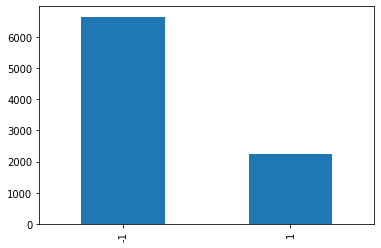

In [ ]:
print('Percentage difference of count: %',round(get_change(Y_train.value_counts()[1], Y_train.value_counts()[-1]), 2))

Y_train.value_counts().plot(kind='bar')
plt.show()

In [ ]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent').fit(X_train, Y_train)

dummy_pred = dummy.predict(X_test)
print(confusion_matrix(Y_test, dummy_pred))

# checking accuracy
print('Test score: ', accuracy_score(Y_test, dummy_pred))

[[2215    0]
 [ 755    0]]
Test score:  0.7457912457912458


## Fixes


1.   Under-sampling: Under-sampling balances the dataset by reducing the size of the abundant class. This method is used when quantity of data is sufficient. By keeping all samples in the rare class and randomly selecting an equal number of samples in the abundant class, a balanced new dataset can be retrieved for further modelling.
2.   Over-sampling: On the contrary, oversampling is used when the quantity of data is insufficient. It tries to balance dataset by increasing the size of rare samples. Rather than getting rid of abundant samples, new rare samples are generated by using e.g. repetition, bootstrapping or SMOTE (Synthetic Minority Over-Sampling Technique)



Some classification problems do not have a balanced number of examples for each class label. As such, it is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.

This is called a stratified train-test split.

We can achieve this by setting the “stratify” argument to the y component of the original dataset. This will be used by the train_test_split() function to ensure that both the train and test sets have the proportion of examples in each class that is present in the provided “y” array.

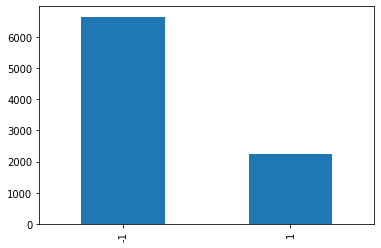

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from sklearn.utils import resample

if fix:
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=7)

  # concatenate our training data back together
  X_new = pd.concat([X_train, Y_train], axis=1)

  # separate minority and majority classes
  downside = X_new[X_new.direction==1] # not_fraud
  upside = X_new[X_new.direction==-1]

  if upsample:
    # upsample minority
    sample = resample(downside,
                            replace=True, # sample with replacement
                            n_samples=len(upside), # match number in majority class
                            random_state=7) # reproducible results
                            # combine majority and upsampled minority
    sample = pd.concat([upside, sample])

    # check new class counts
    print(sample.direction.value_counts())
  elif not upsample:
    # downsample majority
    sample = resample(upside,
                                    replace = False, # sample without replacement
                                    n_samples = len(downside), # match minority n
                                    random_state = 7) # reproducible results

    # combine minority and downsampled majority
    sample = pd.concat([downside, sample])

    print(sample.direction.value_counts())

  Y_train = sample.direction
  X_train = sample.drop('direction', axis=1)

Y_train.value_counts().plot(kind='bar')
plt.show()

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing dataabs
X_test = norm.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Test options and evaluation metric
scoring = "accuracy" # This can help https://scikit-learn.org/stable/modules/model_evaluation.html
classification = True

# Spot-Check Algorithms
models = []
if classification:
  models.append((' LogR ', LogisticRegression()))
  models.append((' DT ', DecisionTreeClassifier()))
  models.append((' Knn ', KNeighborsClassifier()))
  models.append((' LDA ', LinearDiscriminantAnalysis()))
  models.append((' NB ', GaussianNB()))
  models.append((' SVC ', SVC()))
else:
  models.append((' LR ', LinearRegression()))
  models.append((' LASSO ', Lasso()))
  models.append((' EN ', ElasticNet()))
  models.append((' KNN ', KNeighborsRegressor()))
  models.append((' CART ', DecisionTreeRegressor()))
  models.append((' SVR ', SVR()))

## Train And Testing Model


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

results = []
names = []

if classification:
  for name, model in models:
    model.fit(X_train, Y_train)
    print('---------------------------' + name + '---------------------------')
    print('CONFUSION MATRIX: ')
    pred = model.predict(X_test)
    print(confusion_matrix(Y_test, pred))
    print(classification_report(Y_test, pred))
    print("Accuracy of %s on training set: %.2f " % (name, model.score(X_train, Y_train)))
    print("Accuracy of %s on test set: %.2f " % (name, model.score(X_test, Y_test)))
else:
  # evaluate each model in turn
  for name, model in models:
      kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
      cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
      # print(cv_results)
      results.append(cv_results)
      names.append(name)
      msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
      print(msg)

--------------------------- LogR ---------------------------
CONFUSION MATRIX: 
[[2215    0]
 [ 755    0]]
              precision    recall  f1-score   support

          -1       0.75      1.00      0.85      2215
           1       0.00      0.00      0.00       755

    accuracy                           0.75      2970
   macro avg       0.37      0.50      0.43      2970
weighted avg       0.56      0.75      0.64      2970

Accuracy of  LogR  on training set: 0.75 
Accuracy of  LogR  on test set: 0.75 
--------------------------- DT ---------------------------
CONFUSION MATRIX: 
[[2215    0]
 [   0  755]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      2215
           1       1.00      1.00      1.00       755

    accuracy                           1.00      2970
   macro avg       1.00      1.00      1.00      2970
weighted avg       1.00      1.00      1.00      2970

Accuracy of  DT  on training set: 1.00 
Accuracy of  D

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      2215
           1       1.00      1.00      1.00       755

    accuracy                           1.00      2970
   macro avg       1.00      1.00      1.00      2970
weighted avg       1.00      1.00      1.00      2970

Accuracy of  Knn  on training set: 1.00 
Accuracy of  Knn  on test set: 1.00 
--------------------------- LDA ---------------------------
CONFUSION MATRIX: 
[[2094  121]
 [ 266  489]]
              precision    recall  f1-score   support

          -1       0.89      0.95      0.92      2215
           1       0.80      0.65      0.72       755

    accuracy                           0.87      2970
   macro avg       0.84      0.80      0.82      2970
weighted avg       0.87      0.87      0.86      2970

Accuracy of  LDA  on training set: 0.88 
Accuracy of  LDA  on test set: 0.87 
--------------------------- NB ---------------------------
CONFUSION MATRIX: 
[[1985

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of  SVC  on training set: 0.75 
Accuracy of  SVC  on test set: 0.75 
